# Part I - Propser Loan Data
## by (Samson Amwata)

## Introduction
This dataset contains loan information of about 113,937 rows with 81 variables on each
loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

I am looking forward to investigate the following questions
- What factors affect a loan’s outcome status?
- What affects the borrower’s APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?



## Preliminary Wrangling


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Load dataset
df = pd.read_csv("prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.shape

(113937, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?

> We have 113937 rows and 81 columns or features. From describe function it seems most of the features are numeric, some are categorical and others are time/periodical features 

### What is/are the main feature(s) of interest in your dataset?

> I am interested in borrowers features and features related to loan or those that affect loan performance. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> In this analysis I will be focusing on the following columns that I suspect has effect on the loan performance  

``` 
[ListingNumber, CreditGrade',Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, BorrowerState, Occupation, EmploymentStatus, InvestmentFromFriendsCount, InvestmentFromFriendsAmount,LoanOriginalAmount,ProsperRating (Alpha),IncomeRange', StatedMonthlyIncome, LoanCurrentDaysDelinquent, LoanOriginalAmount, LoanOriginationDate,  MonthlyLoanPayment and Investors ]
```

In [8]:
columns_sub = ['ListingNumber', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 
               'BorrowerRate', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'InvestmentFromFriendsCount', 
               'InvestmentFromFriendsAmount', 'LoanOriginalAmount', 'ProsperRating (Alpha)','ProsperScore','IncomeRange', 
               'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent', 'DebtToIncomeRatio','LoanOriginalAmount', 'LoanOriginationDate',  
               'MonthlyLoanPayment', 'Investors','IsBorrowerHomeowner' ]
loan_df1 = df[columns_sub]
loan_df1.head()

,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,...,ProsperScore,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,DebtToIncomeRatio,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,IsBorrowerHomeowner
0,193129,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,CO,Other,Self-employed,...,NaN,"$25,000-49,999",3083.333333,0,0.17,9425,2007-09-12 00:00:00,330.43,258,True
1,1209647,NaN,36,Current,NaN,0.12016,0.0920,CO,Professional,Employed,...,7.0,"$50,000-74,999",6125.000000,0,0.18,10000,2014-03-03 00:00:00,318.93,1,False
2,81716,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,GA,Other,Not available,...,NaN,Not displayed,2083.333333,0,0.06,3001,2007-01-17 00:00:00,123.32,41,False
3,658116,NaN,36,Current,NaN,0.12528,0.0974,GA,Skilled Labor,Employed,...,9.0,"$25,000-49,999",2875.000000,0,0.15,10000,2012-11-01 00:00:00,321.45,158,True
4,909464,NaN,36,Current,NaN,0.24614,0.2085,MN,Executive,Employed,...,4.0,"$100,000+",9583.333333,0,0.26,15000,2013-09-20 00:00:00,563.97,20,True


In [9]:
#Rename ProsperRating (Alpha) column by removing the (Alpha)
loan_df2=loan_df1.copy()
loan_df2.rename(columns = {'ProsperRating (Alpha)':'ProsperRating'}, inplace = True)
loan_df2.head()

,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,...,ProsperScore,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,DebtToIncomeRatio,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,IsBorrowerHomeowner
0,193129,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,CO,Other,Self-employed,...,NaN,"$25,000-49,999",3083.333333,0,0.17,9425,2007-09-12 00:00:00,330.43,258,True
1,1209647,NaN,36,Current,NaN,0.12016,0.0920,CO,Professional,Employed,...,7.0,"$50,000-74,999",6125.000000,0,0.18,10000,2014-03-03 00:00:00,318.93,1,False
2,81716,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,GA,Other,Not available,...,NaN,Not displayed,2083.333333,0,0.06,3001,2007-01-17 00:00:00,123.32,41,False
3,658116,NaN,36,Current,NaN,0.12528,0.0974,GA,Skilled Labor,Employed,...,9.0,"$25,000-49,999",2875.000000,0,0.15,10000,2012-11-01 00:00:00,321.45,158,True
4,909464,NaN,36,Current,NaN,0.24614,0.2085,MN,Executive,Employed,...,4.0,"$100,000+",9583.333333,0,0.26,15000,2013-09-20 00:00:00,563.97,20,True


In [10]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ListingNumber                113937 non-null  int64  
 1   CreditGrade                  28953 non-null   object 
 2   Term                         113937 non-null  int64  
 3   LoanStatus                   113937 non-null  object 
 4   ClosedDate                   55089 non-null   object 
 5   BorrowerAPR                  113912 non-null  float64
 6   BorrowerRate                 113937 non-null  float64
 7   BorrowerState                108422 non-null  object 
 8   Occupation                   110349 non-null  object 
 9   EmploymentStatus             111682 non-null  object 
 10  InvestmentFromFriendsCount   113937 non-null  int64  
 11  InvestmentFromFriendsAmount  113937 non-null  float64
 12  LoanOriginalAmount           113937 non-null  int64  
 13 

## Data cleaning

#### Definition of data cleaning issues
1. Remove duplicates rows
2. Convert the date columns to date data type
3. Rename ProsperRating (Alpha) column to `ProsperRating`
4. Replace `NaT` dates to Null
5. Add new columns Month and Year pulled from loanOriginateDate column
6. We have `Not employed` and `Not displayed` in the list of ranges. We can replace this with `$0`
7. Replace True and False values in `IsBorrowerHomeowner` to have Yes or No


In [11]:
#check for duplicates
loan_df2.duplicated().sum()

0

In [12]:
#Drop the duplicate rows
loan_df3=loan_df2.copy()
loan_df3.drop_duplicates(keep=False, inplace=True)

In [13]:
#Check to confirm if we still have duplicate rows
loan_df3.duplicated().sum()

0

In [14]:
#Convert ClosedDate and LoanOriginationDate column to datetime data type
loan_df4 =loan_df3.copy()
loan_df4["ClosedDate"]=pd.to_datetime(loan_df3["ClosedDate"])
loan_df4["LoanOriginationDate"]=pd.to_datetime(loan_df3["LoanOriginationDate"])

In [15]:
#After converting now check the column
loan_df4.ClosedDate[:5]

0   2009-08-14
1          NaT
2   2009-12-17
3          NaT
4          NaT
Name: ClosedDate, dtype: datetime64[ns]

In [16]:
#After converting now check the column
loan_df4.LoanOriginationDate[:5]

0   2007-09-12
1   2014-03-03
2   2007-01-17
3   2012-11-01
4   2013-09-20
Name: LoanOriginationDate, dtype: datetime64[ns]

In [17]:
#Replace NaT with null
loan_df4=loan_df4.copy()
loan_df4['ClosedDate_test'] = loan_df4['ClosedDate'].replace("NaT", np.nan)
loan_df4.ClosedDate_test[:10]

0   2009-08-14
1          NaT
2   2009-12-17
3          NaT
4          NaT
5          NaT
6          NaT
7          NaT
8          NaT
9          NaT
Name: ClosedDate_test, dtype: datetime64[ns]

### Define
Add new columns Month and Year pulled from loanOriginateDate column
#check for duplicates

In [18]:
#Add month and year columns
loan_df5=loan_df4.copy()
loan_df5['loan_year'] = pd.DatetimeIndex(loan_df5['LoanOriginationDate']).year
loan_df5['loan_month'] = pd.DatetimeIndex(loan_df5['LoanOriginationDate']).month

### Test

In [19]:
loan_df5.loan_year[:5]

0    2007
1    2014
2    2007
3    2012
4    2013
Name: loan_year, dtype: int64

In [20]:
loan_df5.loan_month[:5]

0     9
1     3
2     1
3    11
4     9
Name: loan_month, dtype: int64

### Define
Create a column with Howmowner being Yes or No

### Code

In [21]:
loan_df6=loan_df5.copy()
loan_df6["HomeOwner"]= loan_df6.IsBorrowerHomeowner.map(lambda IsBorrowerHomeowner:'Yes' if IsBorrowerHomeowner==True else 'No')

### Test

In [22]:
loan_df6.HomeOwner.value_counts()

Yes    57478
No     56459
Name: HomeOwner, dtype: int64

### Define
We have `Not employed` and `Not displayed` in the list of ranges. We can put this as `$0` so that we have a clean chart

### Code

In [23]:
#Replace Not employed and Not displayed with $0
loan_df7=loan_df6.copy()
loan_df7["IncomeRange"]=loan_df7["IncomeRange"].replace(["Not employed", "Not displayed"], "$0").ffill()

### Test

In [24]:
loan_df7.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$0                 9168
$1-24,999          7274
Name: IncomeRange, dtype: int64

## Functions

In [25]:
#Function to define the chart labels
def plotlabel(xlab,ylab,title):
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)

In [81]:
#Function to create a histogram
def histplot(df,Var):
    plt.figure(figsize = [8, 5])
    bins = np.arange(0, loan_df.BorrowerRate.max()+0.06, 0.01)
    base_color = sns.color_palette()[0]
    plt.hist(data = df, x = Var, bins = bins, color=base_color);
    plt.title(f'''Distribution of {Var}'''.title())
    plt.xlabel(Var.title(), fontsize=10)
    plt.ylabel('Count'.title())

## Univariate Exploration


In [26]:
#make a copy of the final table from data cleaning to use in analysis
loan_df=loan_df7.copy()
#Check the value counts for home Owners
loan_df['HomeOwner'].value_counts()

Yes    57478
No     56459
Name: HomeOwner, dtype: int64

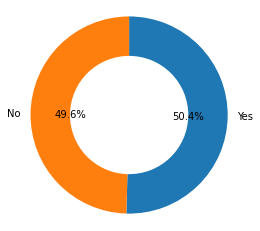

In [27]:
# Plot the count to check whether the borrower is home owner
type_counts = loan_df['HomeOwner'].value_counts()
plt.pie(type_counts, labels = type_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4}, autopct='%1.1f%%');
plt.axis('square');

From the chart we can find out that the borrowers with Homes were more with 1% which is not very much high. 

### BorrowerRate
The **BorrowerRate** - This is defined as the interest rate on the annual cost of a loan to  a borrower which is expressed as a percentage. 

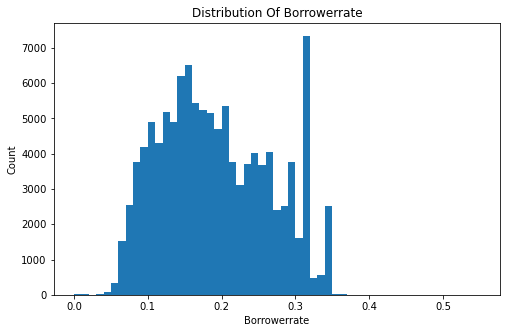

In [82]:
histplot(loan_df,'BorrowerRate')

In [76]:
#This is for testing the function
# def histplot(df,Var):
#     plt.figure(figsize = [8, 5])
#     bins = np.arange(0, loan_df.BorrowerRate.max()+0.06, 0.01)
#     base_color = sns.color_palette()[0]
#     plt.hist(data = df, x = Var, bins = bins, color=base_color);
#     plt.title(f'''Distribution of {Var}'''.title(), fontsize=14, weight='bold')
#     plt.xlabel(Var.title(), fontsize=10, weight='bold')
#     plt.ylabel('Count'.title(),fontsize=14, weight='bold')

### BorrowerAPR
The **BorrowerAPR** - This is defined as the annual cost of the loan which contains other fees like discounts and other deductions.

In [29]:
loan_df.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

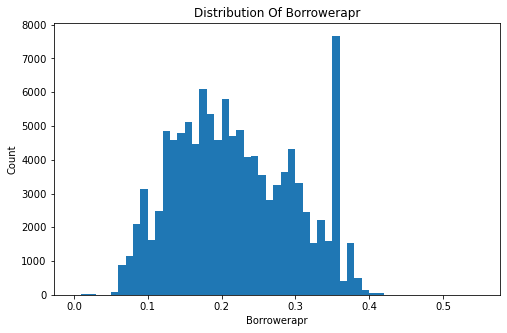

In [83]:
histplot(loan_df,'BorrowerAPR')

The distribution of Borrower rate and Borrower APR looks multimodal. There is a peak centered at 0.2 and there is a very high increase between 0.35 and 0.36.

### StatedMonthlyIncome

**StatedMonthlyIncome** - This is the monthly income declared by the borrower 

In [31]:
loan_df.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

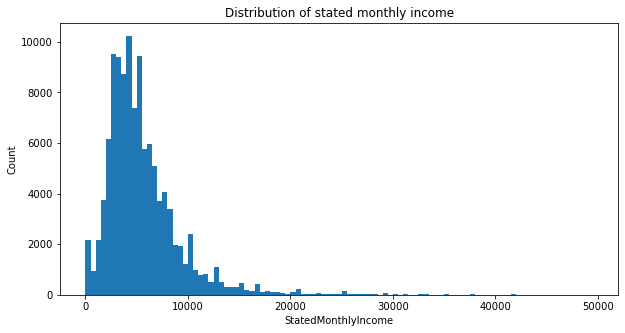

In [116]:
def stated_monthly_income():
  # define parameters
    bins = np.arange(0, 50000, 500)
    plt.figure(figsize=[10, 5])
    base_color = sns.color_palette()[0]
    plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins=bins, color=base_color)
    plotlabel('StatedMonthlyIncome','Count', 'Distribution of stated monthly income');
stated_monthly_income()


From the graph it seems that most borrowers income is less than 4k with the mean of 5k and the monthly income is skewed to the right. let us now see the other features assosciated with borrowers with more than 10k monthly income 

In [33]:
more_than_10k = loan_df.query("StatedMonthlyIncome >1e5")
more_than_10k

,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,...,DebtToIncomeRatio,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,IsBorrowerHomeowner,ClosedDate_test,loan_year,loan_month,HomeOwner
8066,500651,NaN,36,Completed,2012-01-26,0.35643,0.3199,IL,Police Officer/Correction Officer,Employed,...,0.00,2000,2011-04-26,87.10,10,True,2012-01-26,2011,4,Yes
8870,66246,A,36,Chargedoff,2009-08-11,0.12700,0.1200,CT,Other,Not available,...,0.01,12500,2006-12-12,415.18,105,True,2009-08-11,2006,12,Yes
17411,501462,NaN,36,Completed,2013-04-11,0.35643,0.3199,HI,Professional,Employed,...,0.00,7500,2011-05-06,326.62,128,True,2013-04-11,2011,5,Yes
35218,461028,NaN,36,Completed,2013-06-11,0.07389,0.0705,VA,Attorney,Full-time,...,NaN,1000,2010-06-11,0.00,58,True,2013-06-11,2010,6,Yes
45028,589104,NaN,36,Current,NaT,0.33973,0.2999,KS,Nurse (RN),Self-employed,...,NaN,4000,2012-05-17,169.78,15,False,NaT,2012,5,No
53014,694401,NaN,12,Completed,2014-01-23,0.25785,0.1795,CA,Other,Self-employed,...,NaN,4000,2013-01-23,366.62,93,True,2014-01-23,2013,1,Yes
53167,560783,NaN,36,Current,NaT,0.35797,0.3177,OR,Professional,Self-employed,...,NaN,4000,2012-02-24,173.71,2,True,NaT,2012,2,Yes
56867,120075,AA,36,Completed,2007-05-11,0.11144,0.1045,NC,Other,Self-employed,...,0.01,25000,2007-04-18,811.97,434,True,2007-05-11,2007,4,Yes
57133,499194,NaN,36,Current,NaT,0.35643,0.3199,CT,Other,Employed,...,0.00,4000,2011-04-05,174.20,72,True,NaT,2011,4,Yes
59298,558458,NaN,36,Current,NaT,0.24246,0.2049,CT,Other,Self-employed,...,NaN,15000,2012-03-20,561.21,204,False,NaT,2012,3,No


It seems that most users who indicated they earn more than 10k dollars a month are self employed and took less than 5k dollars of loan.


### Debt to Income Ratio

**Debt to Income Ratio** - This compares the amount the borrowers owe each month to the amount the borrower earn

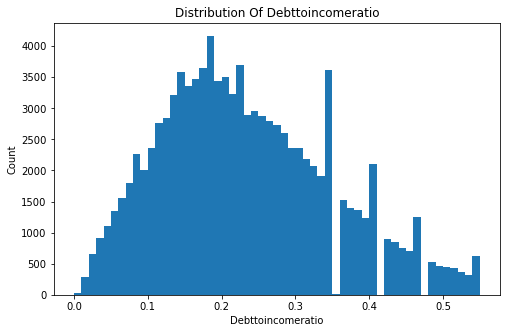

In [84]:
histplot(loan_df,'DebtToIncomeRatio')

From the graph it shows that most borrowers debt to income ratio is between 18% t0 20%. There was a spike in debt ratio at 35%

### LoanOriginationDate
This is defined as

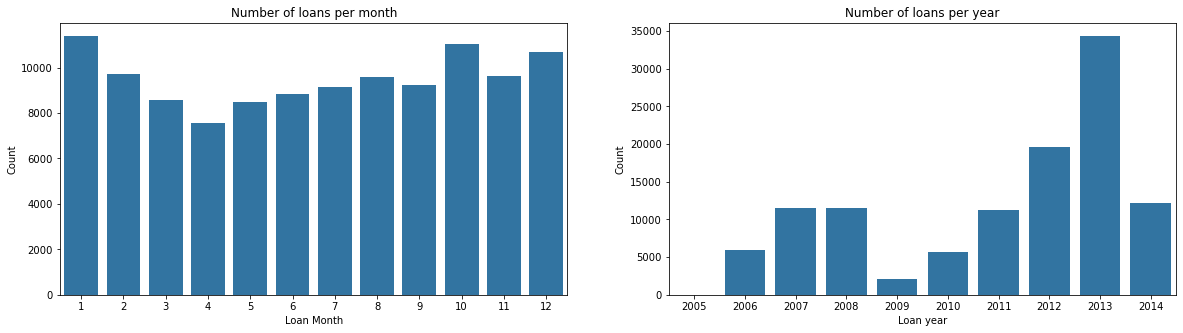

In [35]:
plt.figure(figsize = [20, 5])
#Plot the count of loan on each month 
plt.subplot(1, 2, 1)
base_color = sns.color_palette()[0]
sns.countplot(data=loan_df, x='loan_month', color=base_color)
plotlabel('Loan Month','Count', 'Number of loans per month');


# Plot the count of loans on each year
plt.subplot(1, 2, 2)
base_color = sns.color_palette()[0]
sns.countplot(data=loan_df, x='loan_year', color=base_color)
plotlabel('Loan year','Count', 'Number of loans per year');


From the charts the vizualization loans by month there was a high number of loans in January October and December. It is also noted that the loans by year dropped off in 2009 and there was high number of loans in 2013

### Loan Status

In [36]:
loan_df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

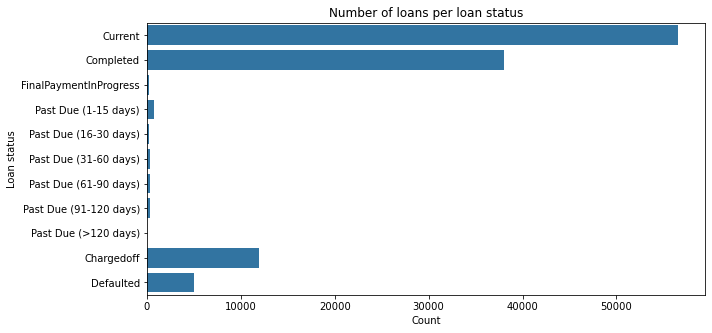

In [119]:
# Plot the count of loans on each year
plt.figure(figsize = [10, 5])
type_counts = loan_df['LoanStatus'].value_counts()
order = ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)'
        ,'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)', 'Chargedoff', 'Defaulted']
base_color = sns.color_palette()[0]
sns.countplot(data=loan_df, y='LoanStatus', color=base_color, order=order)
plotlabel('Count','Loan status','Number of loans per loan status');


From the chart it shows that most of the loans are Current and quite good number of loans have been completed or paid of fully. Only 5 loans have been cancelled and 16 loans are past due for more than 3 months


### Income Range

In [38]:
loan_df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$0                 9168
$1-24,999          7274
Name: IncomeRange, dtype: int64

In [102]:
# create categories
categories =  ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]
var = pd.api.types.CategoricalDtype(ordered = True, categories = categories)
loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(var)

In [40]:
loan_df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$0                 9168
$1-24,999          7274
Name: IncomeRange, dtype: int64

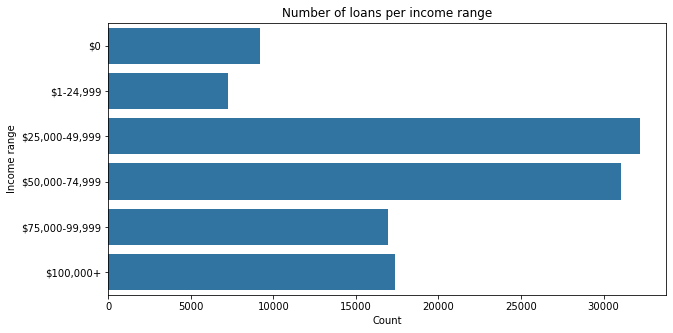

In [103]:
# Plot the count of loans on each year
plt.figure(figsize = [10, 5])
type_counts = loan_df['IncomeRange'].value_counts()
order = type_counts.index
base_color = sns.color_palette()[0]
sns.countplot(data=loan_df, y='IncomeRange', color=base_color, order=categories)
plotlabel('Count','Income range','Number of loans per income range');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of Borrower rate and Borrower APR looks multimodal. There is a peak centered at 0.2 and there is a very high increase between 0.35 and 0.36
>  Most borrowers debt to income ratio is between 18% t0 20%.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I noticed that there was a high number of loans in January October and December months of the year which also was noted that the loans by year dropped off from 2008 to 2009 and there was high number of loans in 2013. 
> I also noted that most of the borrowers have monthly income of less than 4k dollars where those that have more than 10k monthly icome was borrowing less than 4k dollars.
> There is no need of further transformation of data

## Bivariate Exploration



### Borrowers Rate Vs Period

In [42]:
loan_df.head()

,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,BorrowerState,Occupation,EmploymentStatus,...,DebtToIncomeRatio,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,IsBorrowerHomeowner,ClosedDate_test,loan_year,loan_month,HomeOwner
0,193129,C,36,Completed,2009-08-14,0.16516,0.1580,CO,Other,Self-employed,...,0.17,9425,2007-09-12,330.43,258,True,2009-08-14,2007,9,Yes
1,1209647,NaN,36,Current,NaT,0.12016,0.0920,CO,Professional,Employed,...,0.18,10000,2014-03-03,318.93,1,False,NaT,2014,3,No
2,81716,HR,36,Completed,2009-12-17,0.28269,0.2750,GA,Other,Not available,...,0.06,3001,2007-01-17,123.32,41,False,2009-12-17,2007,1,No
3,658116,NaN,36,Current,NaT,0.12528,0.0974,GA,Skilled Labor,Employed,...,0.15,10000,2012-11-01,321.45,158,True,NaT,2012,11,Yes
4,909464,NaN,36,Current,NaT,0.24614,0.2085,MN,Executive,Employed,...,0.26,15000,2013-09-20,563.97,20,True,NaT,2013,9,Yes


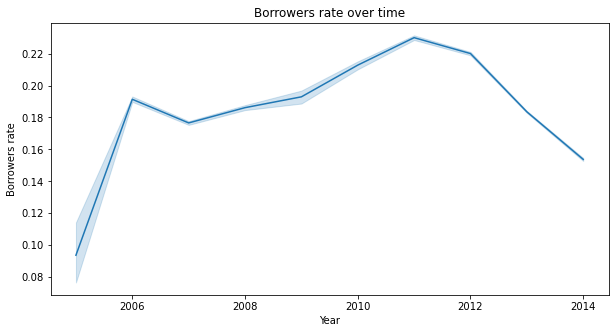

In [43]:
#Plot a line graph over time
plt.figure(figsize = [10, 5])
sns.lineplot(data=loan_df, x="loan_year", y="BorrowerRate")
plotlabel('Year','Borrowers rate','Borrowers rate over time');

Borrower's rate is defined as the interest rate on the annual cost of a loan to a borrower which is expressed as a percentage.
As you can see from the chart this rate increased between 2007 an 2011 qhich is seen to reduce steadily from 2012 to 2014

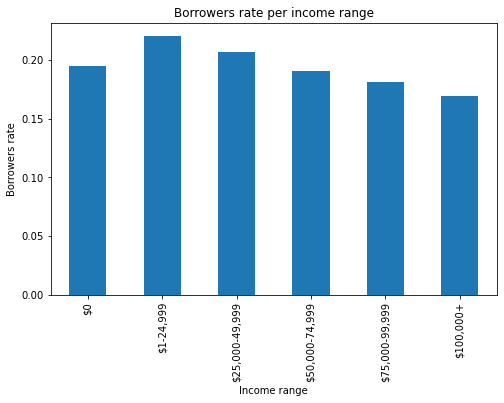

In [111]:
plot_data = loan_df.groupby('IncomeRange')['BorrowerRate'].mean()
order = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]
plot_data.index
plot_data.plot(kind ='bar',color=base_color,figsize=(8,5), legend=False, sort_columns=order)
plotlabel('Income range','Borrowers rate','Borrowers rate per income range');

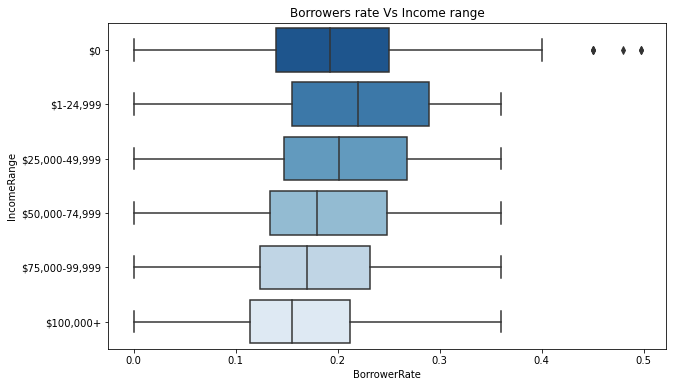

In [110]:
#Plot a box plot between income range and the year
plt.figure(figsize = [10, 6])
order = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]
sns.boxplot(data = loan_df, x="BorrowerRate", y="IncomeRange", palette = 'Blues_r', order=order)
plotlabel('BorrowerRate','IncomeRange','Borrowers rate Vs Income range');

We can see that borrowers rate has negative correlation with Income range where the Borrowers rate reduces with increased income rate. This means that the borrowers with high income range is having a lower interest rate which I think it is sales technique to allow high income earners to borrow more

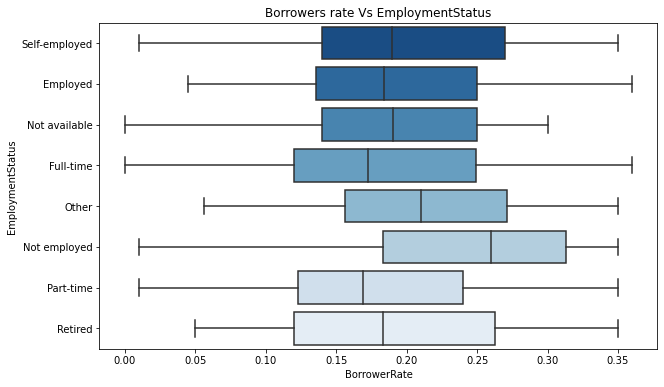

In [46]:
#Plot a box plot between income range and the year
plt.figure(figsize = [10, 6])
sns.boxplot(data = loan_df, x="BorrowerRate", y="EmploymentStatus", palette = 'Blues_r')
plotlabel('BorrowerRate','EmploymentStatus','Borrowers rate Vs EmploymentStatus');

Same as Income range, borrowers rate have negative correlation to employment status where those who are employed get lower interest compared to those who are not empoyed

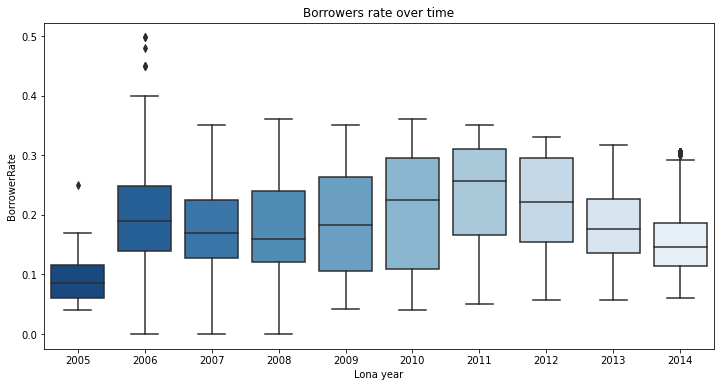

In [47]:
#Plot a box plot between income range and the year
plt.figure(figsize = [12, 6])
sns.boxplot(data = loan_df, x="loan_year", y="BorrowerRate", palette = 'Blues_r')
plotlabel('Lona year','BorrowerRate','Borrowers rate over time');

We can see that borrowers in 2011 got the highest interest rate compared to borrowers in 2005 who got the lowest interest rate

In [48]:
# def mycountplot(df,xVar):
#     plt.figure(figsize = [12, 6])
#     sns.countplot(data=df, x=xVar, color=base_color);
#     plt.title(f'''Distribution of {xVar}'''.title(), fontsize=14, weight='bold')
#     plt.xlabel(xVar.title(), fontsize=10, weight='bold')
#     plt.ylabel('Frequency'.title(),fontsize=14, weight='bold')

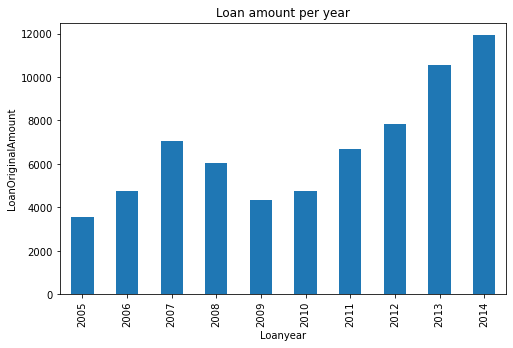

In [49]:
#Plot a graph to show Loan amount borrowed over time
loan_df.groupby('loan_year')['LoanOriginalAmount'].mean().plot(kind='bar',color=base_color,figsize=(8,5), legend=False)
plotlabel('Loanyear','LoanOriginalAmount','Loan amount per year');

From the charts it shows that the amount of loans borrowered by year dropped off in 2009 and there was high number of loan amount in 2013 and increased steadily after 2009

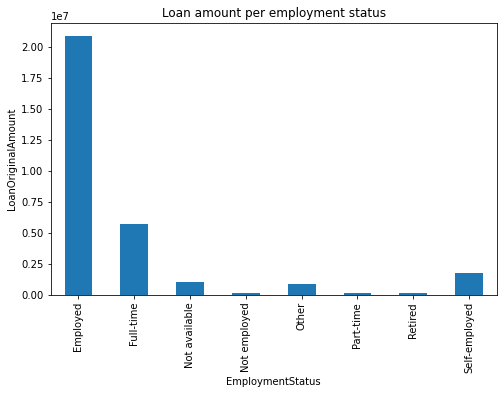

In [50]:
plot_data = loan_df.groupby('EmploymentStatus')['MonthlyLoanPayment'].sum()
plot_data.index
plot_data.plot(kind ='bar',color=base_color,figsize=(8,5), legend=False)
plotlabel('EmploymentStatus','LoanOriginalAmount','Loan amount per employment status');

We can see that those who are employed borrowed more amount followed by borrowers with Full-time jobs. This can be true because of job security. Borrowers with job security have high borrowers rate

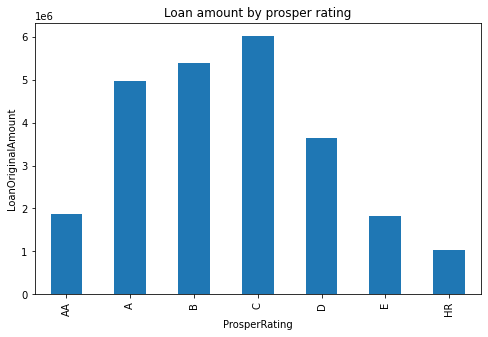

In [127]:
plot_data = loan_df.groupby('ProsperRating')['MonthlyLoanPayment'].sum()
prosper_order = ["AA", "A", "B", "C", "D", "E", "HR"]
loan_df.ProsperRating = pd.Categorical(loan_df.ProsperRating, categories=prosper_order, ordered=True)
plot_data.plot(kind ='bar',color=base_color,figsize=(8,5), legend=False, sort_columns=prosper_order)
plotlabel('ProsperRating','LoanOriginalAmount','Loan amount by prosper rating');

In [125]:
loan_df.ProsperRating.value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating, dtype: int64

We can see that the borrowers with prosper rating C borrowed more amount compared to even the borrowers with prosper rating of A. Hower the borrowes with the least prosper rating `HR` has the least total amount borrowed

In [52]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ListingNumber                113937 non-null  int64         
 1   CreditGrade                  28953 non-null   object        
 2   Term                         113937 non-null  int64         
 3   LoanStatus                   113937 non-null  object        
 4   ClosedDate                   55089 non-null   datetime64[ns]
 5   BorrowerAPR                  113912 non-null  float64       
 6   BorrowerRate                 113937 non-null  float64       
 7   BorrowerState                108422 non-null  object        
 8   Occupation                   110349 non-null  object        
 9   EmploymentStatus             111682 non-null  object        
 10  InvestmentFromFriendsCount   113937 non-null  int64         
 11  InvestmentFromFriendsAmoun

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the start I choose Borrowers Rate as I think it has effect on the potential amount the borrower can be entitled to. I noticed that the Borrower Rate has effect on the amount where the amount borrowed increased with higher ratings across all terms

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Borrowers with more monthly income and borrowers rate was borrowing more money and there fore the loan amount is positivey correlated with stated monthly income and borrowers rate.

## Multivariate Exploration

### Borrowers Rate Vs Employment status over time

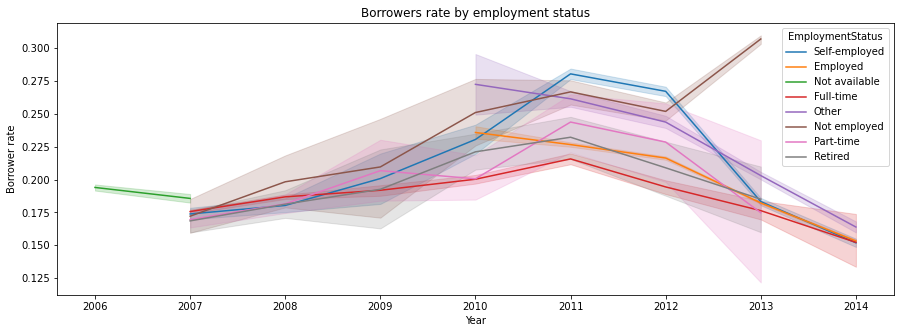

In [53]:
#Plot a line graph over time
plt.figure(figsize = [15, 5])
sns.lineplot(data=loan_df, x="loan_year", y="BorrowerRate", hue="EmploymentStatus")
plotlabel('Year','Borrower rate','Borrowers rate by employment status');

From the graph we find out that those borrowers with Full time job was getting lowest interest rate over time and those who are self employed and Not employed had high interest rate.
Also we can see that the interest rate for those not employed increased significantly from 2012 while those employed and with full time jpob decreased signficantly at the same period.
This can be because of job security and repayment confidence.

### Borrowers rate Vs HomeOwners

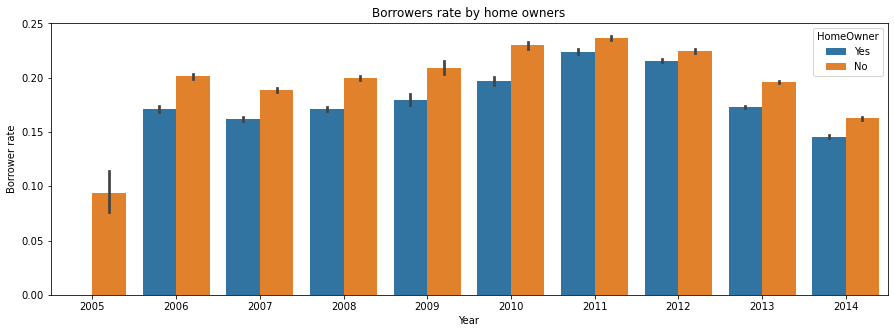

In [54]:
#Plot borrower bar graph over time
plt.figure(figsize = [15, 5])
sns.barplot(data=loan_df, x="loan_year", y="BorrowerRate", hue="HomeOwner")
plotlabel('Year','Borrower rate','Borrowers rate by home owners')
plt.show();

This also shows that the intereste rate for borrowers also depended on whether the borrower had a home or not. It shows that those with homes had lower interest rate compared to those without homes

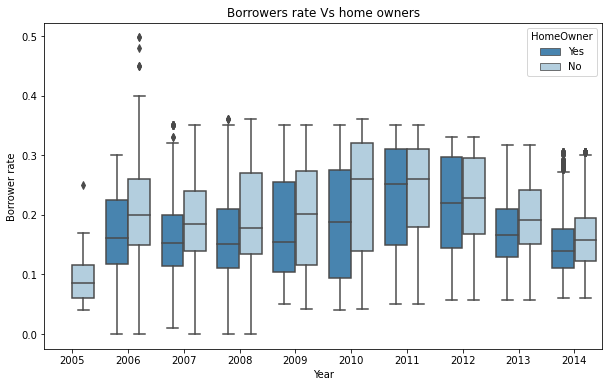

In [55]:
#Plot a box plot between borrowers rate and the year grouped by if the borrower is a home owner
plt.figure(figsize = [10, 6])
sns.boxplot(data = loan_df, x="loan_year", y="BorrowerRate", hue="HomeOwner", palette = 'Blues_r')
plotlabel('Year','Borrower rate','Borrowers rate Vs home owners')
plt.show();

I wanted to check the relationship between Interest rate among borrowers with home and those without. From the chart we can notice that the homeowners got lower interest  rate in general throughout the years.
We also have outliers on 2005 2006 2007 2008 and 2014. we might consider removing them if we decide to do predictive analysis

In [56]:
#Plot a box plot between borrowers rate and the year grouped by if the borrower is a home owner
# loan_df['LoanOriginalAmount']=loan_df['LoanOriginalAmount'].astype(int)
# plt.figure(figsize = [20, 6])
# sns.boxplot(data = loan_df, x="ProsperRating", y="LoanOriginalAmount", hue="LoanStatus", palette = 'Blues_r')


In [57]:
data= loan_df[loan_df['ProsperRating'].notna()]
data.ProsperRating.value_counts()
#data['ProsperRating']=data['ProsperRating'].astype(int)

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating, dtype: int64

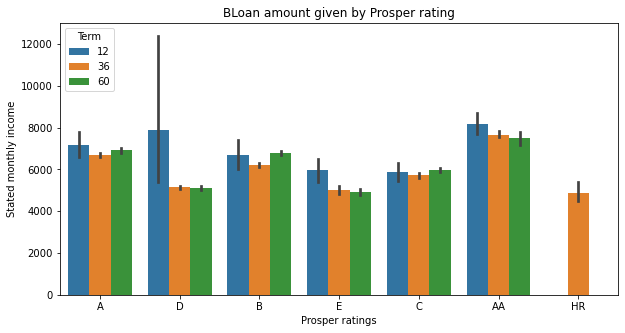

In [58]:
plt.figure(figsize = [10, 5])
sns.barplot(data=loan_df, x="ProsperRating", y="StatedMonthlyIncome", hue="Term")
plotlabel('Prosper ratings','Stated monthly income','BLoan amount given by Prosper rating');

From the graph we can see that there is a relationship between the ratings and the amount of loan given. The better the rating the higher the loan amount. Also in most of the terms it seems that most borrowers preferred short terms where short term borrowed more than those with long term

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the start I choose `Borrowers Rate` as I think it has effect on the potential amount the borrower can be entitled to. 
I noticed that the Borrower Rate has effect on the amount where the amount borrowed increased with higher ratings across all terms 

### Were there any interesting or surprising interactions between features?

> From the analysis I was able to find out that those borrowers with Full time job was getting lowest interest rate over time and those who are self employed and Not employed had high interest rate. 

> Also those employed and those with full time job got lowest interests over time

> Employed and self employed borrowed high amounts

> Loan amount borrowed decred from 2007 to 2009 but increased steadily from 2009 to 2014

## Conclusions
From the analysis I can conclude that the following features have effect on the amount of the loan borrowed
1. Borrowers Rate - The higher the ratings the higher the amount
2. Prosper ratings - The better the prosper ratings does not mean the higher the amount borrowed but it seems that middle ratings borrowers borrowed more amount
3. Employment status - Employed borrowers got better interest rate compared with those who are not employed
4. Stated income range - Borrowers with high income range borrowed less amount compared with those borrowers with less income range
